<a href="https://colab.research.google.com/github/idrismunir15/activity_classifier/blob/main/activity_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ACTIVITY PREDICTION MODEL USING SENSOR DATA**

In the data collection experiments, we collected data for seven physical activities. These are walking, sitting, standing, jogging, biking, walking upstairs and walking downstairs, which are mainly used in the related studies and they are the basic motion activities in daily life. There were ten participants involved in our data collection experiment who performed each of these activities for 3-4 minutes. All ten participants were male, between the ages of 25 and 30.

The experiments were carried out indoors in one of the university buildings, except biking. For walking, and jogging, the department corridor was used. For walking upstairs and downstairs, a 5-floor building with stairs was used.
Each of these participants was equipped with five smartphones on five body positions:
1.	One in their right jean�s pocket.
2.	One in their left jean�s pocket.
3.	One on belt position towards the right leg using a belt clipper.
4.	One on the right upper arm.
5.	One on the right wrist.
The first three positions are commonly used by people carrying smartphones. The fourth position is usually used when activities like jogging are performed. However, we used this position for all activities to see its role on the performance.  

A smart-watch was simulated with the fifth position as smart-watches are coming into the market these days.  For these experiments, we used Samsung Galaxy SII (i9100) smartphones. The orientation of the smartphones was portrait for the upper arm, wrist, and two pockets, and landscape for the belt position. The data was recorded for all five positions at the same time for each activity and it was collected at a rate of 50 samples per second. This sampling rate (50 samples per second) is enough to recognize human physical activities, as we show in our previous study . Moreover, in the state of the art, frequencies lower than 50 samples per second have been shown to be sufficient for activity recognition. For data collection, we adapted our own data collection app from our previous study by adding the linear acceleration sensor. The data was collected for an accelerometer, a gyroscope, a magnetometer, and a linear acceleration sensor.


Notation in these files:

Accelerometer ( Ax = x-axis, Ay = y-axis, Az= Z-aixs)   
Linear Acceleration Sensor ( Lx = x-axis, Ly = y axis, Lz= Z-aixs)
Gyroscope ( Gx = x-axis, Gy = y-axis, Gz= Z-aixs)
Magnetometer ( Mx = x-axis, My = y-axis, Mz= Z-aixs)

**iMPORT AND INSTALL REQUIRED LIBRARIES**



In [ ]:
!pip install h2o pandas-profiling

In [2]:
#import the basic data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
import glob
pd.set_option('display.max_columns', None)
%matplotlib inline

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/activity.csv')

In [5]:
df.head()

,time_stamp,Ax,Ay,Az,Lx,Ly,Lz,Gx,Gy,Gz,Mx,My,Mz,Ax.1,Ay.1,Az.1,Lx.1,Ly.1,Lz.1,Gx.1,Gy.1,Gz.1,Mx.1,My.1,Mz.1,Ax.2,Ay.2,Az.2,Lx.2,Ly.2,Lz.2,Gx.2,Gy.2,Gz.2,Mx.2,My.2,Mz.2,Ax.3,Ay.3,Az.3,Lx.3,Ly.3,Lz.3,Gx.3,Gy.3,Gz.3,Mx.3,My.3,Mz.3,Ax.4,Ay.4,Az.4,Lx.4,Ly.4,Lz.4,Gx.4,Gy.4,Gz.4,Mx.4,My.4,Mz.4,activity
0,1.390000e+12,-1.81150,-14.873,-1.34840,-1.26910,-5.1057,-0.66445,-0.53206,-3.18690,0.23976,12.72,40.74,-6.00,-1.19860,-13.852,3.7865,-1.76980,-4.0625,3.89850,-3.6255,1.07390,0.13622,18.84,55.92,-6.72,0.17706,-10.569,1.8251,-7.5051,-4.7736,-0.062476,-0.36652,1.27060,-0.52412,-30.30,31.08,3.96,2.79220,-12.5720,-4.3177,-0.098712,-3.385700,-2.46480,0.021075,1.02990,1.22690,-18.72,31.74,17.82,4.3177,-2.36990,-0.43585,-5.3574,-0.95749,0.318860,0.52565,-0.18815,0.285880,-22.20,6.48,4.56,walking
1,1.390000e+12,0.24517,-14.070,-0.84446,0.70147,-4.2969,-0.17199,-0.25229,-1.79660,0.40745,12.54,40.74,-6.78,-2.38360,-16.590,2.9965,-2.70250,-6.7890,2.86820,-3.4899,0.39034,0.40073,18.60,55.86,-6.06,0.16344,-12.190,2.0703,-7.3573,-6.2618,-0.042442,-0.54459,1.28070,0.34025,-31.02,29.88,3.36,2.38360,-10.9920,-4.6037,-0.404440,-1.774500,-2.74830,0.201890,0.53573,1.32280,-18.84,31.74,17.70,5.1213,-2.19290,-0.70826,-4.5352,-0.67629,0.081656,0.43616,0.16371,0.198230,-21.90,7.14,5.34,walking
2,1.390000e+12,-0.57205,-14.628,-1.75700,-0.21760,-4.8531,-1.05650,-1.04920,0.29138,0.29230,12.42,40.68,-8.10,-4.63090,-16.603,2.0703,-4.34550,-6.8081,1.68890,-3.3851,-1.99200,1.12280,18.72,55.80,-4.26,0.57205,-12.626,2.2474,-6.7655,-6.5138,0.017921,-0.70952,1.15820,0.99724,-31.26,29.22,3.24,1.56630,-9.0848,-4.5764,-1.003600,0.201530,-2.75150,0.287720,0.10049,1.20710,-19.02,31.68,17.52,5.6116,-2.12480,-1.26670,-4.0408,-0.55974,-0.523690,0.32284,0.43127,0.211970,-21.60,7.50,5.64,walking
3,1.390000e+12,-0.69464,-12.939,-3.09180,-0.32273,-3.1786,-2.21970,-2.37200,1.00820,0.34972,12.30,40.74,-8.52,-4.78070,-16.453,1.1577,-4.19540,-6.6731,0.74084,-3.1017,-3.04390,0.79138,18.84,55.62,-3.12,1.21220,-12.476,2.2882,-5.9716,-6.1990,0.016760,-0.78191,1.10200,1.33380,-31.44,28.80,3.24,-0.61292,-8.5263,-2.9284,-2.827100,0.859490,-1.14670,0.175930,-0.21441,0.90469,-18.96,31.86,17.22,6.0611,-1.47100,-2.47890,-3.5908,0.15795,-1.880200,0.20403,0.72846,0.164930,-21.12,8.40,6.12,walking
4,1.390000e+12,0.87170,-12.000,-1.56630,1.13740,-2.2390,-0.65476,-2.79010,0.65485,0.22724,12.24,40.80,-8.88,-0.92618,-12.190,-1.0624,-0.18116,-2.4144,-1.28500,-2.7587,-4.46020,0.69364,19.38,55.44,-0.84,2.24740,-11.387,1.9886,-4.6603,-4.8230,-0.329740,-0.82436,0.90561,2.15600,-31.56,28.32,3.30,-1.18500,-9.3436,-2.2337,-3.209900,0.085583,-0.45569,-0.033292,-0.48625,0.60720,-18.84,32.10,17.04,7.7091,-0.77636,-3.54130,-1.9450,0.85796,-2.995300,0.09896,0.94379,0.064752,-20.94,8.70,6.30,walking


### Create a Data Quality Report for the combined Dataset

In [6]:
from pandas_profiling import ProfileReport as pr
report=pr(df)

**Data Preprocessing**


*   From the data quality report, the class "upsatirs" is obviously an error and should be merged with "upstairs".



<Axes: title={'center': 'Original Class Distribution'}>

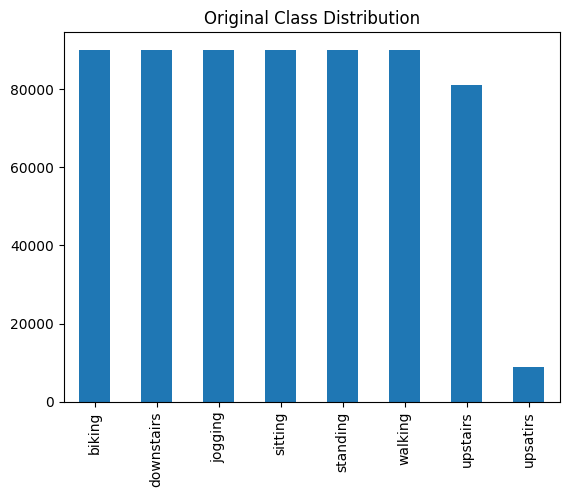

In [12]:
df.activity.value_counts().plot(kind='bar',title="Original Class Distribution")

<Axes: title={'center': 'Class distribution after Correction'}>

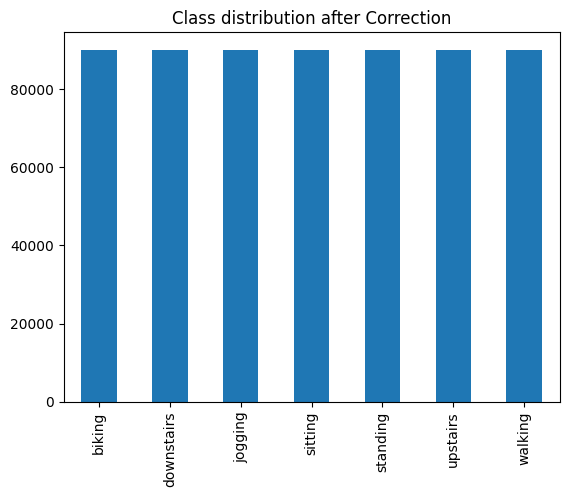

In [14]:
df.replace('upsatirs','upstairs',inplace=True)
df.activity.value_counts().plot(kind='bar', title='Class distribution after Correction')

**Model Development with H2o:**

The AutoML function is used for finding the best model and data preparation techniques that give the best performance on our specific dataset.

In [23]:
#use automl using h2o to predict the activity

import h2o
from h2o.automl import H2OAutoML

#shut down h2o instance if any
if h2o.connection():
  h2o.cluster().shutdown()
h2o.init()


# Set the list of algorithms to include
#include_algos = ["XGBoost", "DRF", "GBM", "DeepLearning", "StackedEnsemble"]
df['activity']=df['activity'].astype('category')

classification_metrics = "AUC"
h2o_df=h2o.H2OFrame(df)
h2o_df['activity']=h2o_df['activity'].asfactor()

train,test=h2o_df.split_frame(ratios=[0.8])
x=h2o_df.columns
y='activity'
x.remove(y)
aml=H2OAutoML(max_runtime_secs=600, stopping_metric='AUC', stopping_rounds=5, seed=1,sort_metric=classification_metrics)
aml.train(x=x,y=y,training_frame=train)
lb=aml.leaderboard
print(lb.head(rows=lb.nrows))

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp5fbuq460
  JVM stdout: /tmp/tmp5fbuq460/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp5fbuq460/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_sr5yxa
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
04:36:32.741: _train param, Dropping bad and constant columns: [time_stamp]

█████████████████████
04:39:45.262: _train param, Dropping bad and constant columns: [time_stamp]

█████████████████
04:42:34.555: _train param, Dropping bad and constant columns: [time_stamp]

███████████████████
04:45:36.993: _train param, Dropping unused columns: [time_stamp]

██████| (done) 100%
model_id                                                  auc    mean_per_class_error     logloss       rmse          mse
XGBoost_1_AutoML_1_20230914_43627                         nan             0.000710258  0.00430032  0.0271714  0.000738283
GBM_1_AutoML_1_20230914_43627                             nan             0.013654     0.397399    0.334346   0.111787
GLM_1_AutoML_1_20230914_43627                             nan             0.353946     1.76783     0.827308   0.684439
StackedEnsemble_BestOfFami

**Model Performance Evaluation**

In [18]:
perf=aml.leader.model_performance(test)
print(perf)

ModelMetricsMultinomialGLM: glm
** Reported on test data. **

MSE: 0.6845624173998462
RMSE: 0.8273828723147744
LogLoss: 1.7686930160080647
Null degrees of freedom: 126140
Residual degrees of freedom: 125719
Null deviance: 490924.6505395867
Residual deviance: 446209.4114645466
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
biking    downstairs    jogging    sitting    standing    upstairs    walking    Error      Rate
--------  ------------  ---------  ---------  ----------  ----------  ---------  ---------  ----------------
9184      11            27         8703       0           13          4          0.488128   8,758 / 17,942
61

In [24]:
pred=aml.predict(test)
pred.head()

#h2o.cluster().shutdown()

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


predict,biking,downstairs,jogging,sitting,standing,upstairs,walking
walking,1.88137e-06,0.00158637,9.2945e-05,4.94089e-06,7.39525e-06,0.0002612,0.998045
walking,2.46083e-06,0.0014029,6.17268e-05,6.11775e-06,8.69143e-06,0.000136253,0.998382
walking,1.04298e-05,0.000690596,9.76915e-05,1.58202e-05,1.50816e-05,0.00130809,0.997862
walking,3.04632e-06,7.84528e-05,7.67094e-05,2.6564e-06,2.549e-06,4.09396e-05,0.999796
walking,3.01463e-06,0.00068295,1.98202e-05,1.2865e-05,1.33297e-05,0.00017205,0.999096
walking,3.30631e-05,0.00231446,7.51088e-05,2.54756e-05,3.17142e-05,0.00016601,0.997354
walking,6.43116e-06,0.000358744,0.000116623,8.05619e-06,7.17119e-06,0.000200424,0.999303
walking,8.5514e-06,0.000124982,3.72293e-05,1.10475e-05,8.57162e-06,0.00142391,0.998386
walking,5.38144e-06,0.000318347,7.67548e-05,1.07328e-05,2.05243e-05,0.000742941,0.998825
walking,5.27954e-06,0.0010702,4.63965e-05,1.07009e-05,1.01675e-05,0.000932558,0.997925


**Evaluating the AUC-ROC curve for each class.**
Higher ROC indicates better distinction from other classes.

In [ ]:
# Get predicted probabilities on the test set
probs = pred["biking"].as_data_frame()["biking"].values

# True labels for the test set
true_labels = test["activity"].as_data_frame()["target"].values

# Import relevant scikit-learn metrics for performance evaluation
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Compute ROC curve and ROC AUC for binary classification
fpr, tpr, _ = roc_curve(true_labels, probs)
roc_auc = auc(fpr, tpr)

# Create an ROC curve plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix for binary classification
conf_matrix = confusion_matrix(true_labels, probs > 0.5)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ["Predicted Negative", "Predicted Positive"])
plt.yticks([0, 1], ["Actual Negative", "Actual Positive"])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()